In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

### Meshgrid 1 

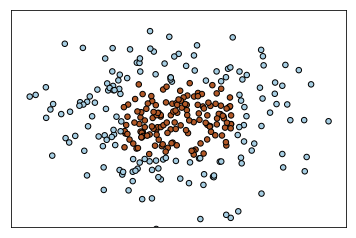

In [3]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_and(np.logical_and(X[:, 0]>-1, X[:, 0]<1), np.logical_and(X[:, 1] > -1,X[:, 1] < 1))

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

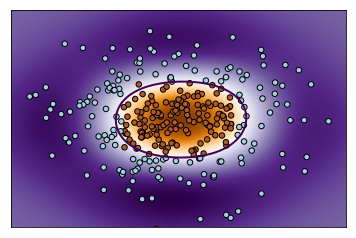

In [4]:
clf = svm.SVC(gamma='auto')
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='spline16',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
            origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### Meshgrid 2

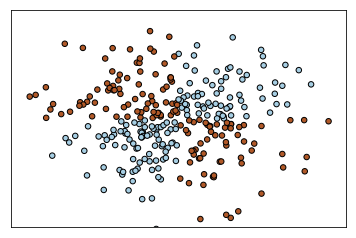

In [20]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

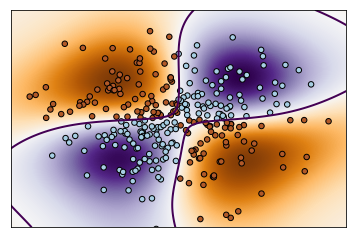

In [21]:
clf = svm.SVC(gamma='auto')
clf.fit(X, y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='spline16',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
            origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### Preprocessing + SVM

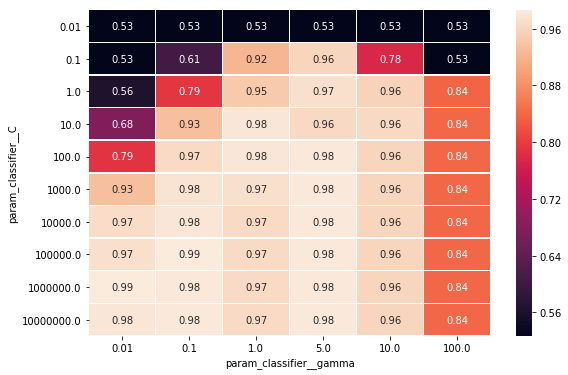

In [22]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5,10**6,10**7])
gamma=[0.01,0.1,1,5,10,100]

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, iid=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

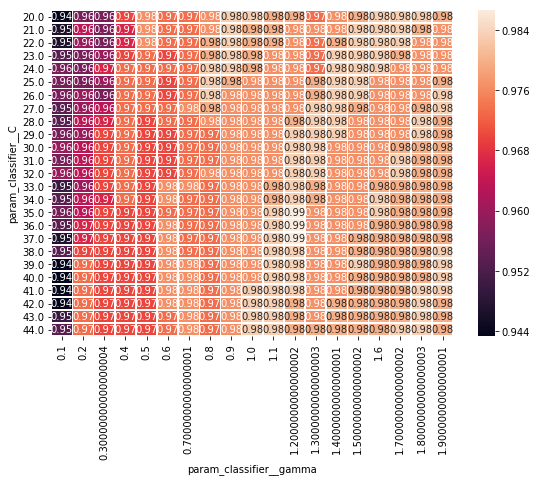

In [27]:
pipe = Pipeline([('preprocessing', StandardScaler()), 
                 ('classifier', svm.SVC())])

C=np.arange(20., 45.)
gamma=np.arange(0.1,2.0, 0.1)

param_grid =[
    {'preprocessing': [StandardScaler()], 
     'classifier': [svm.SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, iid=True)
grid.fit(X,y)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax);

In [28]:
pv_table.stack().head(10)

param_classifier__C  param_classifier__gamma
20.0                 0.1                        0.943333
                     0.2                        0.956667
                     0.3                        0.956667
                     0.4                        0.970000
                     0.5                        0.976667
                     0.6                        0.973333
                     0.7                        0.973333
                     0.8                        0.976667
                     0.9                        0.983333
                     1.0                        0.983333
dtype: float64

In [29]:
display(pv_table.stack().max())
display(pv_table.stack().idxmax())

0.9866666666666667

(35.0, 1.2000000000000002)

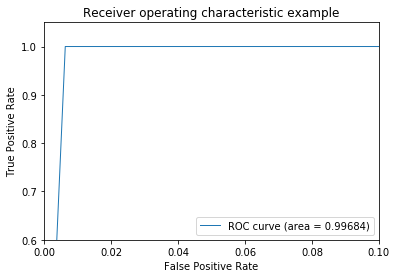

In [32]:
cls = make_pipeline( StandardScaler(),svm.SVC(C=35, gamma=1.2) )
cls.fit(X,y)
y_pred=cls.predict(X)
fpr, tpr, thresholds = roc_curve(y, y_pred)
lw = 1
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.5f)'% roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.xlim([0.0, 0.1])
plt.ylim([0.6, 1.05])
plt.show()

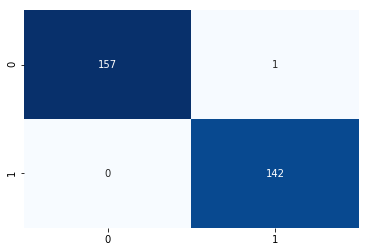

In [33]:
matrix=confusion_matrix(y,y_pred)
sns.heatmap(matrix,annot=True, fmt='g', cbar=None,cmap="Blues");

In [34]:
tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
[tn, fp, fn, tp]

[157, 1, 0, 142]

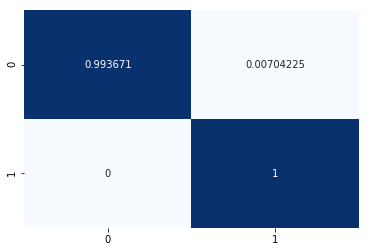

In [35]:
C= confusion_matrix(y,y_pred)
mat_norm=C / C.astype(np.float).sum(axis=1)
sns.heatmap(mat_norm,annot=True, fmt='g', cbar=None,cmap="Blues");